In [1]:
import pandas as pd

In [2]:
sentiment_df = pd.read_csv('D:\\Python_Training\\Trade-behavior\\data\\fear_greed_index.csv') 
trader_df = pd.read_csv("D:\\Python_Training\\Trade-behavior\\data\\historical_data.csv")

In [3]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [5]:
sentiment_df.shape

(2644, 4)

In [6]:
sentiment_df.isna().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [7]:
# Format sentiment data
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [8]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [10]:
trader_df.shape

(211224, 16)

In [11]:
trader_df.isna().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [12]:
# Convert trader timestamp
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['date'] = trader_df['Timestamp IST'].dt.date  # For easy joining

In [13]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [14]:
# Convert sentiment date to match format
sentiment_df['date'] = sentiment_df['date'].dt.date


In [15]:

# Merge on Date
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='left')


In [16]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


Feature engineering

In [17]:
# Aggregate daily features per account and sentiment regime
feat = (
    merged_df.groupby(['Account', 'date', 'classification'])
    .agg(
        daily_pnl=('Closed PnL', 'sum'),
        trade_count=('Transaction Hash', 'nunique'),
        win_trades=('Closed PnL', lambda x: (x > 0).sum()),
        loss_trades=('Closed PnL', lambda x: (x < 0).sum()),
        avg_execution_price=('Execution Price', 'mean'),
        avg_trade_size=('Size Tokens', 'mean'),
        avg_fee=('Fee', 'mean'),
        total_fee=('Fee', 'sum')
    )
    .reset_index()
)

In [18]:

# Additional derived metrics
feat['win_loss_ratio'] = feat['win_trades'] / feat['loss_trades'].replace(0, 1)
feat['win_rate'] = feat['win_trades'] / feat['trade_count'].replace(0, 1)

In [19]:
feat.head()

,Account,date,classification,daily_pnl,trade_count,win_trades,loss_trades,avg_execution_price,avg_trade_size,avg_fee,total_fee,win_loss_ratio,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,134,0,0,3204.461017,1.587571,0.948000,167.796055,0.0,0.00
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,61,0,0,653.365147,16.176471,0.998288,67.883615,0.0,0.00
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,40,0,0,3164.600000,7.500000,2.373450,94.937983,0.0,0.00
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,12,0,12,3382.400000,8.333333,2.818666,33.823995,0.0,0.00
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,16,12,0,232.921111,74.074074,3.874907,104.622490,12.0,0.75


In [20]:
# Per sentiment regime, not just daily
agg_by_sentiment = (
    feat.groupby('classification')
    .agg(
        mean_daily_pnl=('daily_pnl', 'mean'),
        median_daily_pnl=('daily_pnl', 'median'),
        mean_win_rate=('win_rate', 'mean'),
        trades=('trade_count', 'sum')
    )
    .reset_index()
)

In [21]:
agg_by_sentiment.head()

,classification,mean_daily_pnl,median_daily_pnl,mean_win_rate,trades
0,Extreme Fear,4619.439053,218.377399,1.747738,10106
1,Extreme Greed,5161.922644,418.319862,1.568929,22685
2,Fear,5328.818161,107.892532,1.663733,27248
3,Greed,3318.100730,158.214922,1.417866,25679
4,Neutral,3438.618818,167.551743,2.784319,16186


In [22]:
# Save or use engineered features -----
feat.to_csv("D:\\Python_Training\\Trade-behavior\\outputs\\trader_features_by_day.csv", index=False)
agg_by_sentiment.to_csv("D:\\Python_Training\\Trade-behavior\\outputs\\features_by_sentiment.csv", index=False)

In [23]:
# Classify positions based on size and start position
def classify_position(row):
    if row['Start Position'] == 0:
        return 'Open'
    elif row['Size Tokens'] == 0:
        return 'Closed'
    elif row['Size Tokens'] > row['Start Position']:
        return 'Increase'
    elif row['Size Tokens'] < row['Start Position']:
        return 'Decrease'
    else:
        return 'Hold'

merged_df['Position_Type'] = merged_df.apply(classify_position, axis=1)

In [24]:
merged_df['Trade_Direction'] = merged_df['Side'].str.upper() + '_' + merged_df['Direction'].str.upper()

In [25]:
# One-hot encode Classification
sentiment_dummies = pd.get_dummies(merged_df['classification'], prefix='Sentiment')

# Append to DataFrame
merged_df = pd.concat([merged_df, sentiment_dummies], axis=1)


In [26]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,timestamp,value,classification,Position_Type,Trade_Direction,Sentiment_Extreme Fear,Sentiment_Extreme Greed,Sentiment_Fear,Sentiment_Greed,Sentiment_Neutral
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,1.733117e+09,80.0,Extreme Greed,Open,BUY_BUY,False,True,False,False,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,1.733117e+09,80.0,Extreme Greed,Decrease,BUY_BUY,False,True,False,False,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,1.733117e+09,80.0,Extreme Greed,Decrease,BUY_BUY,False,True,False,False,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,1.733117e+09,80.0,Extreme Greed,Decrease,BUY_BUY,False,True,False,False,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,1.733117e+09,80.0,Extreme Greed,Decrease,BUY_BUY,False,True,False,False,False


Exploratory Data Analysis(EDA)

In [27]:
# Calculate performance greed and fear
performance_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean()
performance_by_sentiment.head()

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64

In [28]:
# Calculate net profit
merged_df['Net_Profit'] = merged_df['Closed PnL'] - merged_df['Fee']
merged_df['Net_Profit'].head()

0   -0.345404
1   -0.005600
2   -0.050431
3   -0.050043
4   -0.003055
Name: Net_Profit, dtype: float64

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

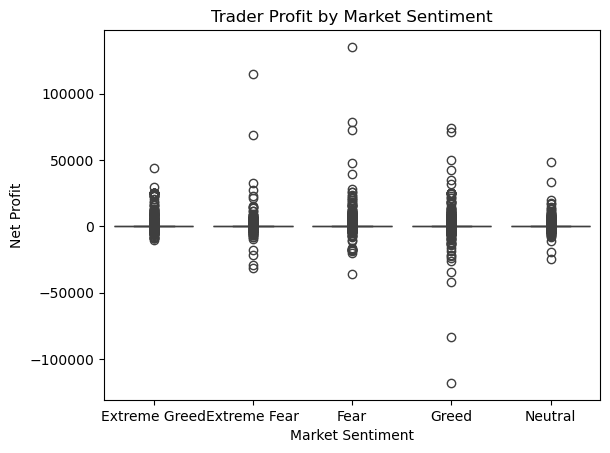

In [30]:
# Profit distribution under fear vs greed
sns.boxplot(x='classification', y='Net_Profit', data=merged_df)
plt.title('Trader Profit by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Net Profit')
plt.show()

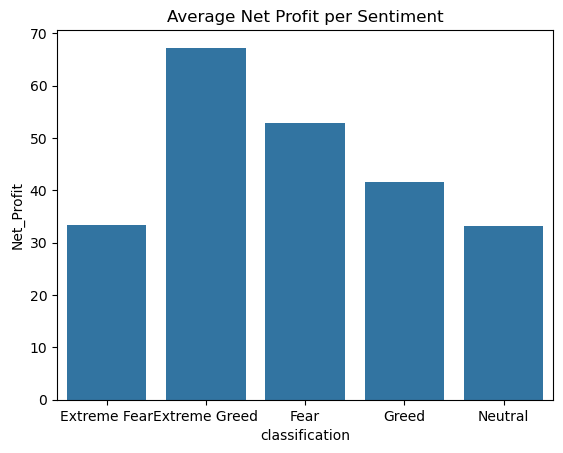

In [31]:
# Average profit by sentiment
avg_profit = merged_df.groupby('classification')['Net_Profit'].mean().reset_index()
sns.barplot(x='classification', y='Net_Profit', data=avg_profit)
plt.title('Average Net Profit per Sentiment')
plt.show()

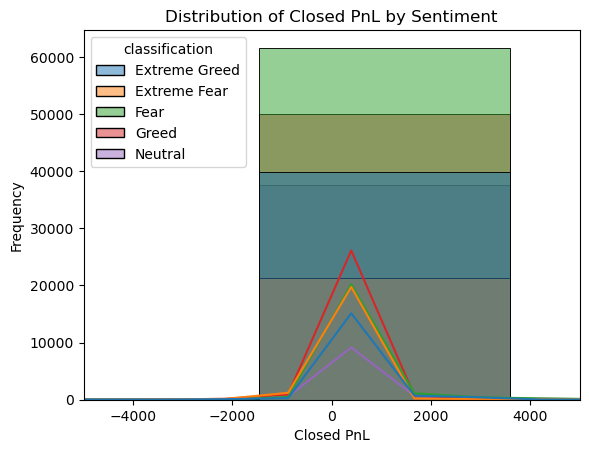

In [32]:
# calculate account performance by sentiment
sns.histplot(data=merged_df, x='Closed PnL', hue='classification', kde=True, bins=50) # k
plt.xlim(-5000, 5000)
plt.title('Distribution of Closed PnL by Sentiment')
plt.xlabel('Closed PnL')    
plt.ylabel('Frequency')
plt.show()

In [33]:
# Calculate account performance by sentiment
# This will give us the total profit/loss per account under each sentiment regime
account_performance = merged_df.groupby(['Account', 'classification'])['Closed PnL'].sum().unstack()
account_performance.head()

classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
Account,,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,124769.221441,-40282.335904,1.113374e+06,276719.270187,125650.116740
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,-4235.153051,35658.894935,-1.658737e+03,30053.395556,-11933.080125
0x271b280974205ca63b716753467d5a371de622ab,16706.884912,1793.160215,3.012191e+04,-100019.806374,-19038.340561
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,-25666.012284,108009.960644,1.342252e+04,31192.591971,5505.749364
0x2c229d22b100a7beb69122eed721cee9b24011dd,11415.247787,90895.050410,3.979191e+03,20075.672949,42292.843076


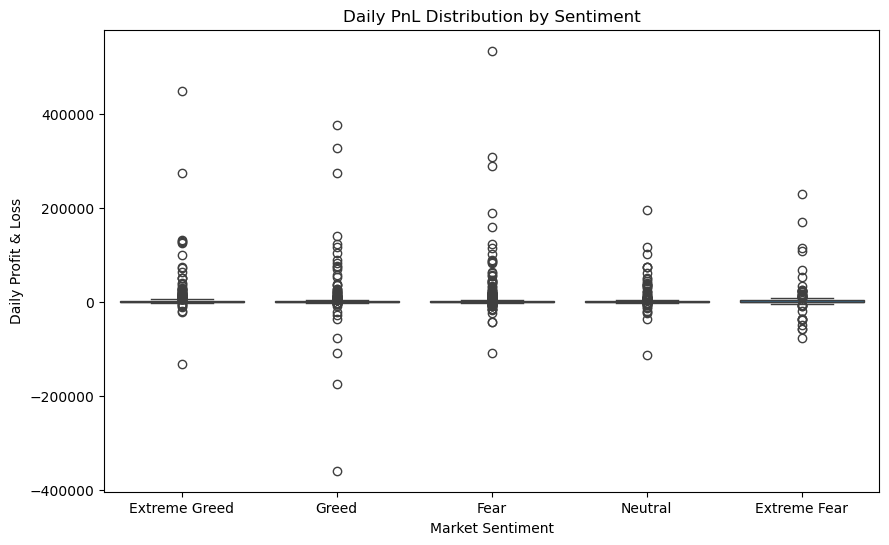

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=feat, x='classification', y='daily_pnl')
plt.title('Daily PnL Distribution by Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Daily Profit & Loss')
plt.show()

C:\Users\dybsb\AppData\Local\Temp\ipykernel_31800\3296451935.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = rolling_pivot.hist(ax=fig.gca(), figsize=(20, 10))  # Get the axes array


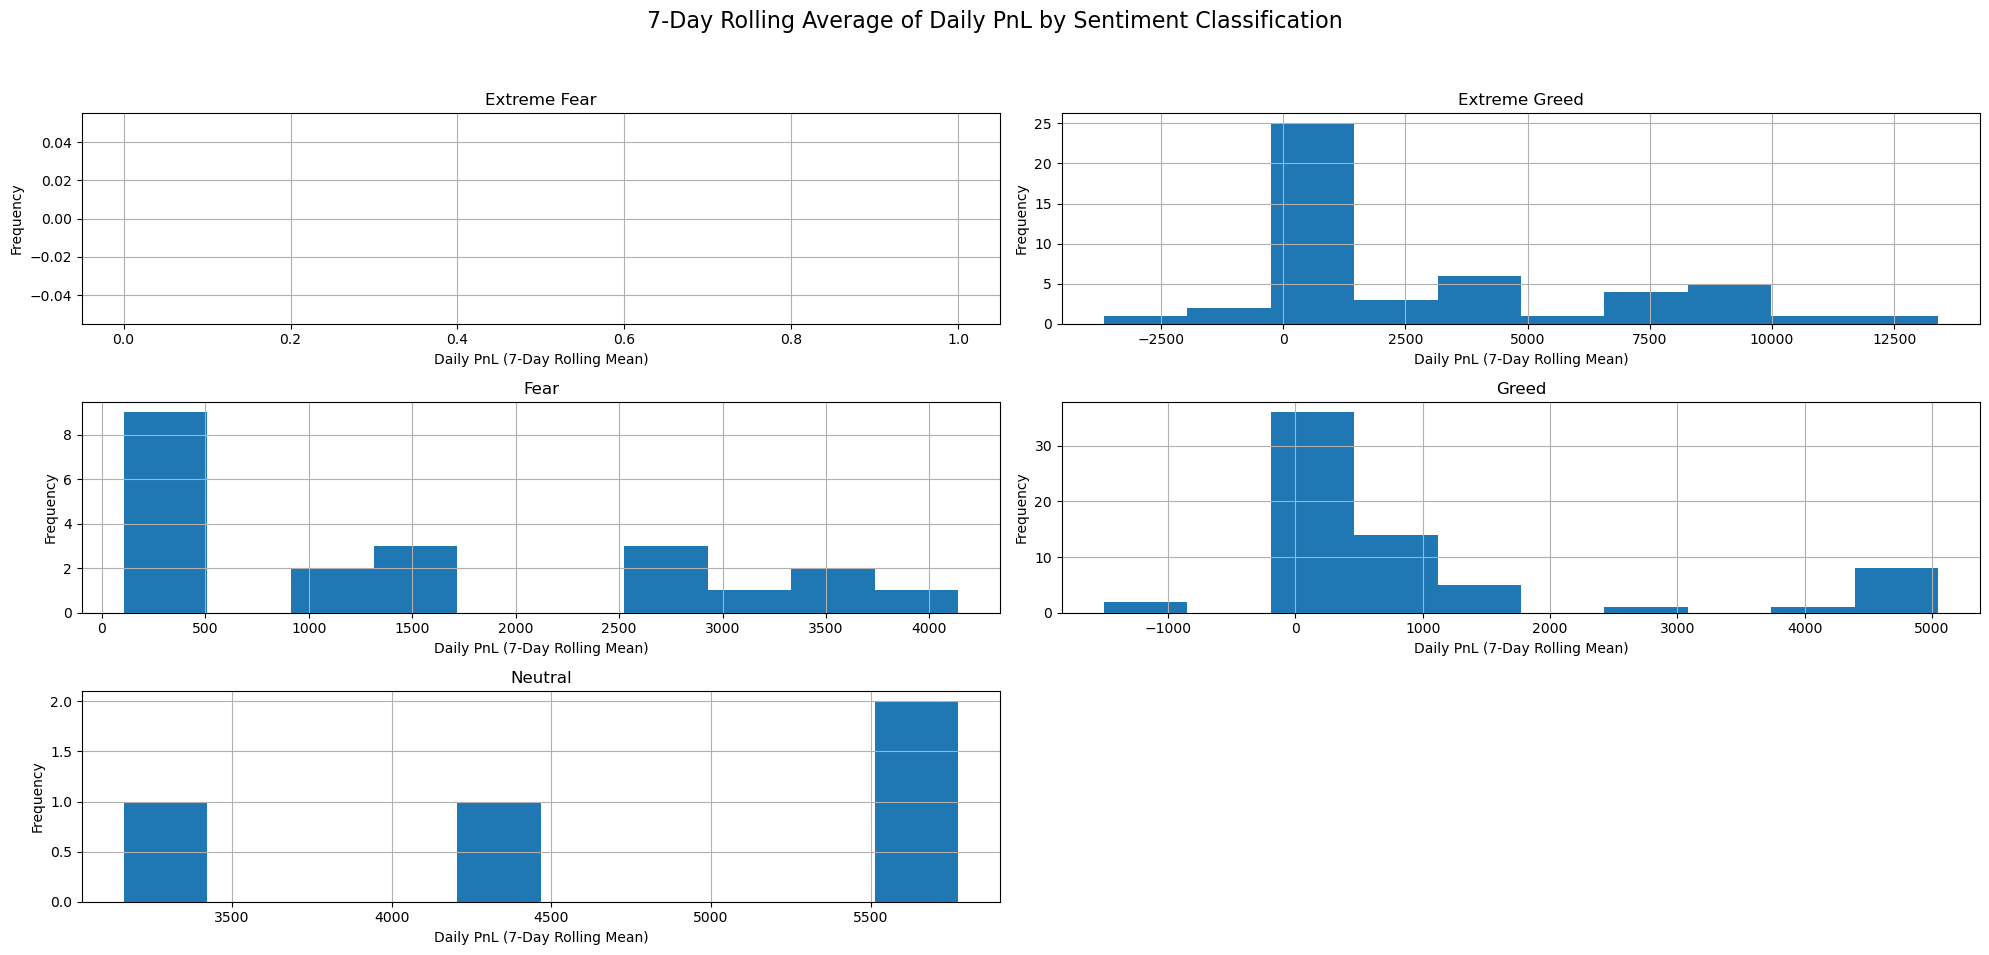

In [45]:
# Convert date to datetime if not already
feat['date'] = pd.to_datetime(feat['date'])

# Pivot table for rolling mean of daily PnL by sentiment classification
pivot = feat.pivot_table('daily_pnl', index='date', columns='classification', aggfunc='mean')
rolling_pivot = pivot.rolling(7).mean()

# Plot histograms
fig = plt.figure(figsize=(20, 10))
axes = rolling_pivot.hist(ax=fig.gca(), figsize=(20, 10))  # Get the axes array

# Label each subplot
for ax in axes.flatten():
    ax.set_xlabel('Daily PnL (7-Day Rolling Mean)')
    ax.set_ylabel('Frequency')
    ax.set_title(ax.get_title())  # keep sentiment title

plt.suptitle('7-Day Rolling Average of Daily PnL by Sentiment Classification', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Make space for suptitle
plt.show()

In [36]:
from scipy.stats import ttest_ind

greed_pnl = feat[feat['classification']=='Greed']['daily_pnl'].dropna()
fear_pnl  = feat[feat['classification']=='Fear']['daily_pnl'].dropna()
stat, pval = ttest_ind(greed_pnl, fear_pnl, equal_var=False)

print(f"T-test statistic: {stat:.4f}, p-value: {pval:.4f}")
# If p-value < 0.05, we reject the null hypothesis that the means are equal

T-test statistic: -1.1540, p-value: 0.2487


In [37]:
feat = feat.sort_values(['Account', 'date'])
feat['rolling_7d_pnl'] = feat.groupby('Account')['daily_pnl'].transform(lambda x: x.rolling(7, min_periods=1).mean())
feat['rolling_7d_win'] = feat.groupby('Account')['win_rate'].transform(lambda x: x.rolling(7, min_periods=1).mean())


In [38]:
# Assuming risk-free rate is zero for simplicity
sharpe_by_sentiment = feat.groupby('classification').apply(
    lambda df: df['daily_pnl'].mean() / (df['daily_pnl'].std() + 1e-9)
)
print(sharpe_by_sentiment)


classification
Extreme Fear     0.156406
Extreme Greed    0.187728
Fear             0.168315
Greed            0.108438
Neutral          0.197080
dtype: float64


C:\Users\dybsb\AppData\Local\Temp\ipykernel_31800\1362058084.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sharpe_by_sentiment = feat.groupby('classification').apply(


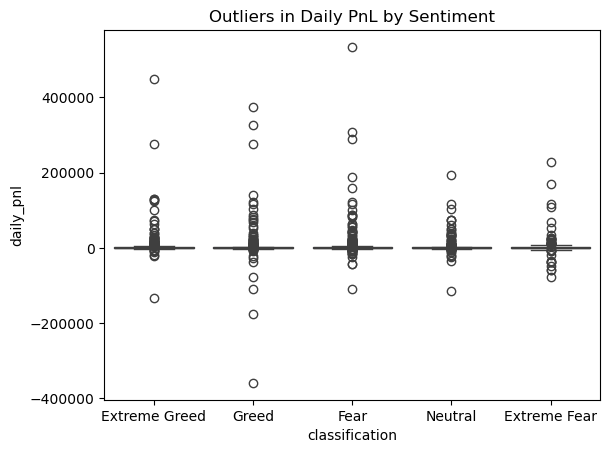

In [39]:
sns.boxplot(x='classification', y='daily_pnl', data=feat)
plt.title("Outliers in Daily PnL by Sentiment")
plt.show()


In [40]:
qlow, qhigh = feat['daily_pnl'].quantile([0.01, 0.99])
feat_no_outliers = feat[(feat['daily_pnl'] >= qlow) & (feat['daily_pnl'] <= qhigh)]
print(f"Rows after outlier removal: {feat_no_outliers.shape[0]}")


Rows after outlier removal: 2292


In [44]:
missing = feat.isnull().sum()
print(missing[missing>0])


Series([], dtype: int64)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a target variable: Positive vs Non-Positive PnL
feat['positive_pnl'] = (feat['daily_pnl'] > 0).astype(int)
X = pd.get_dummies(feat[['win_rate', 'avg_execution_price', 'avg_trade_size', 'classification']], drop_first=True)
y = feat['positive_pnl']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.89      0.93      0.91       187
           1       0.95      0.93      0.94       281

    accuracy                           0.93       468
   macro avg       0.92      0.93      0.92       468
weighted avg       0.93      0.93      0.93       468



In [46]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,value,classification,Position_Type,Trade_Direction,Sentiment_Extreme Fear,Sentiment_Extreme Greed,Sentiment_Fear,Sentiment_Greed,Sentiment_Neutral,Net_Profit
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,80.0,Extreme Greed,Open,BUY_BUY,False,True,False,False,False,-0.345404
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,80.0,Extreme Greed,Decrease,BUY_BUY,False,True,False,False,False,-0.005600
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,80.0,Extreme Greed,Decrease,BUY_BUY,False,True,False,False,False,-0.050431
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,80.0,Extreme Greed,Decrease,BUY_BUY,False,True,False,False,False,-0.050043
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,80.0,Extreme Greed,Decrease,BUY_BUY,False,True,False,False,False,-0.003055


In [ ]:
# Save final merged DataFrame with all features
merged_df.to_csv("D:\\Python_Training\\Trade-behavior\\outputs\\final_merged_trades.csv", index=False)